# Importing Libraries

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import requests
from io import BytesIO
import base64
from Binance_API import BinanceAPI
from RiskMetrics import RiskAnalysis, rolling_var,kupiec_test, performance
from PnL_Computation import PnL
from Stock_Data import get_close
from Rebalancing import *
from Git import *

In [3]:
# %run "Git.ipynb".ipynb

In [4]:
git=GitHub(token,repo_owner,repo_name,branch)

# Importing Data

## Tickers

In [7]:
Binance=BinanceAPI(binance_api_key,binance_api_secret)
Pnl_calculation=PnL(binance_api_key,binance_api_secret)

In [8]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [10]:
start_date=datetime.datetime(2023,12,1)
enddate=datetime.datetime.today()

In [14]:
quantities_api=Binance.binance_api.user_asset()

ClientError: (400, -1021, 'Timestamp for this request is outside of the recvWindow.', {'Content-Type': 'application/json', 'Content-Length': '79', 'Connection': 'keep-alive', 'Date': 'Sat, 23 Aug 2025 22:25:39 GMT', 'Expires': '0', 'Server': 'nginx', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains', 'X-Frame-Options': 'SAMEORIGIN', 'X-Xss-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'Content-Security-Policy': "default-src 'self'", 'X-Content-Security-Policy': "default-src 'self'", 'X-WebKit-CSP': "default-src 'self'", 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'X-Cache': 'Error from cloudfront', 'Via': '1.1 5a012a43a727d36b7bf1976d7c8817dc.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'CDG52-P6', 'X-Amz-Cf-Id': 'nowTnoD1UlymGJAQo65aHQVtJQoglLhHd8Os3wBY7R_IsADRruLaVA=='}, None)

In [ ]:
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

ClientError: (400, -1021, 'Timestamp for this request is outside of the recvWindow.', {'Content-Type': 'application/json', 'Content-Length': '79', 'Connection': 'keep-alive', 'Date': 'Sat, 23 Aug 2025 22:25:09 GMT', 'Expires': '0', 'Server': 'nginx', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains', 'X-Frame-Options': 'SAMEORIGIN', 'X-Xss-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'Content-Security-Policy': "default-src 'self'", 'X-Content-Security-Policy': "default-src 'self'", 'X-WebKit-CSP': "default-src 'self'", 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'X-Cache': 'Error from cloudfront', 'Via': '1.1 5a012a43a727d36b7bf1976d7c8817dc.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'CDG52-P6', 'X-Amz-Cf-Id': 'dXXflehh9Z8dsC1257bLoR4kws5zfsm_ipHjLU95tvqW62xgwTIOgg=='}, None)

In [ ]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [14]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
url='https://github.com/niroojane/Risk-Management/raw/refs/heads/main/Trade%20History%20Reconstructed.xlsx'
myfile = requests.get(url)
# trade_history=pd.read_excel(BytesIO(myfile.content))
trade_history

,Date(UTC),Market,Type,Price,Amount,Total,Fee,Fee Coin
0,2025-08-22 20:15:46,TRXTRY,BUY,14.852000,587.000000,8718.124000,0.000268,BNB
1,2025-08-22 20:14:45,JASMYTRY,SELL,0.682000,12792.000000,8724.144000,0.000269,BNB
2,2025-08-09 00:37:56,BBBNB,SELL,0.000163,116.400000,0.018985,0.000014,BNB
3,2024-09-25 15:25:35,OMUSDT,BUY,1.180300,57.000000,67.277100,0.057000,OM
4,2024-09-25 15:25:35,OMUSDT,BUY,1.180300,34.000000,40.130200,0.034000,OM
...,...,...,...,...,...,...,...,...
77,2024-05-09 22:32:57,TRXEUR,BUY,0.118983,205.828142,25.000000,0.510000,EUR
78,2024-05-09 19:36:50,UMAEUR,BUY,3.803499,6.438808,25.000000,0.510000,EUR
79,2024-05-06 23:27:11,ETHEUR,BUY,2912.268956,0.008407,25.000000,0.510000,EUR
80,2024-05-06 23:15:38,BTCEUR,BUY,59899.712723,0.000409,25.000000,0.510000,EUR


In [15]:
price=Pnl_calculation.get_trade_in_usdt(trade_history)

USDTTRY 0
USDTTRY 1
BNBUSDT 2
OMUSDT 3
OMUSDT 4
OMUSDT 5
TRXUSDT 6
BTCUSDT 7
BTCUSDT 8
TRXUSDT 9
BBUSDT 10
BNBUSDT 11
BTCUSDT 12
BTCUSDT 13
BTCUSDT 14
EURUSDT 15
EURUSDT 16
BBUSDT 17
BNBUSDT 18
JASMYUSDT 19
PEPEUSDT 20
NOTUSDT 21
NOTUSDT 22
NOTUSDT 23
BBUSDT 24
BBUSDT 25
PEPEUSDT 26
JASMYUSDT 27
BTCUSDT 28
BTCUSDT 29
BTCUSDT 30
BTCUSDT 31
BTCUSDT 32
BTCUSDT 33
BTCUSDT 34
BTCUSDT 35
BNBUSDT 36
JASMYUSDT 37
JASMYUSDT 38
ENSUSDT 39
ARUSDT 40
BTCUSDT 41
BTCUSDT 42
ETHUSDT 43
BTCUSDT 44
BTCUSDT 45
BTCUSDT 46
BTCUSDT 47
EURUSDT 48
BTCUSDT 49
BTCUSDT 50
EURUSDT 51
EURUSDT 52
EURUSDT 53
EURUSDT 54
EURUSDT 55
EURUSDT 56
EURUSDT 57
EURUSDT 58
EURUSDT 59
EURUSDT 60
EURUSDT 61
EURUSDT 62
EURUSDT 63
EURUSDT 64
EURUSDT 65
EURUSDT 66
EURUSDT 67
EURUSDT 68
EURUSDT 69
EURUSDT 70
EURUSDT 71
EURUSDT 72
EURUSDT 73
EURUSDT 74
EURUSDT 75
EURUSDT 76
EURUSDT 77
EURUSDT 78
EURUSDT 79
EURUSDT 80
EURUSDT 81


In [16]:
book_cost=Pnl_calculation.get_book_cost(price)
realized_pnl,profit_and_loss=Pnl_calculation.get_pnl(book_cost,price)
historical_positions=Pnl_calculation.get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

historical_positions.rename(columns={'TRYUSDT': 'USDTTRY'}, inplace=True)


In [17]:
realized_pnl_time=pd.DataFrame()
for key in profit_and_loss:

    temp=profit_and_loss[key]
    realized_pnl_time=pd.concat([realized_pnl_time,temp],axis=0)

realized_pnl_time.columns=realized_pnl_time.columns+'USDT'

realized_pnl_time=realized_pnl_time.sort_index().fillna(0)
realized_pnl_time.index=realized_pnl_time.index.strftime(date_format='%Y-%m-%d')
realized_pnl_time.groupby(realized_pnl_time.index).sum()
realized_pnl_time=realized_pnl_time.cumsum()
realized_pnl_time = realized_pnl_time[~realized_pnl_time.index.duplicated(keep='last')]
realized_pnl_time=realized_pnl_time.sum(axis=1)

C:\Users\niroo\AppData\Local\Temp\ipykernel_38636\1326421339.py:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  realized_pnl_time=pd.concat([realized_pnl_time,temp],axis=0)


In [18]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()


In [19]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:20].to_list()

In [20]:
holding=Binance.get_inventory()
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
holding_tickers.append('PAXGUSDT')
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Average Cost','Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.loc['Total','Average Cost']=np.nan

pnl.loc['Total','Book Cost']=pnl.loc['Total','Price in USDT']-pnl.loc['Total','Total PnL']
# pnl['Total PnL %']=pnl['Total PnL']/(pnl['Price in USDT']-pnl['Total PnL'])*100
pnl['Total PnL %']=pnl['Total PnL']/(pnl.loc['Total','Book Cost'])*100

pnl.sort_values(ascending=False,by='Price in USDT').round(2)


,Average Cost,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL,Total PnL %
Total,NaN,2187.23,2255.92,1.00,-273.34,342.03,68.69,3.14
BTCUSDT,70306.87,622.27,1035.19,0.46,2.80,412.92,415.72,19.01
TRXUSDT,0.20,216.87,393.35,0.17,-12.30,176.48,164.18,7.51
SOLUSDT,157.06,281.20,357.12,0.16,0.00,75.92,75.92,3.47
ETHUSDT,3654.53,253.39,334.25,0.15,0.00,80.85,80.85,3.70
OMUSDT,1.13,526.32,117.80,0.05,0.00,-408.52,-408.52,-18.68
BNBUSDT,680.95,13.83,18.21,0.01,-10.59,4.38,-6.21,-0.28
PEPEUSDT,0.00,0.00,0.00,0.00,-38.52,-0.00,-38.52,-1.76
ENSUSDT,23.73,0.00,0.00,0.00,-3.54,0.00,-3.54,-0.16
NOTUSDT,0.02,0.00,0.00,0.00,1.01,0.00,1.01,0.05


In [21]:
days=(enddate-start_date).days
remaining=days%500
numbers_of_table=days//500
remaining

131

In [22]:
# data1=Binance.get_price(tickers,start_date)
# data2=Binance.get_price(tickers,enddate)
# data=data1.combine_first(data2)
# data.index=pd.to_datetime(data.index)
# #data=data.dropna(axis=1)
# n=len(data.columns)
# data=data.sort_index()

In [23]:
temp_end=start_date
prices=pd.DataFrame()
for i in range(numbers_of_table+1):
    temp_data=Binance.get_price(tickers,temp_end)
    temp_end=temp_end+datetime.timedelta(500)
    prices=prices.combine_first(temp_data)
    
temp_end=temp_end+datetime.timedelta(500)
last_data=Binance.get_price(tickers,temp_end)
data=prices.combine_first(last_data)
data=data.sort_index()
data = data[~data.index.duplicated(keep='first')]

In [24]:
data.index=pd.to_datetime(data.index)
n=len(data.columns)
data=data.sort_index()

In [25]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [26]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [27]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [29]:
#position=pd.read_excel('Positions.xlsx',index_col=0)
url='https://github.com/niroojane/Risk-Management/raw/refs/heads/main/Positions.xlsx'
myfile = requests.get(url)
position=pd.read_excel(BytesIO(myfile.content),index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')
git.push_or_update_file(positions,'Positions')

🔁 File exists. Will update (SHA: aadcd2b753b8ace0fe60f3233b05ff6ce967f2b1)
✅ File pushed/updated successfully!


In [30]:
positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [31]:
url='https://github.com/niroojane/Risk-Management/raw/refs/heads/main/Quantities.xlsx'
myfile = requests.get(url)
quantities_history=pd.read_excel(BytesIO(myfile.content),index_col=0)
#quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

In [32]:
quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx',index=False)

quantities_tickers=list(quantities.columns)

In [33]:
git.push_or_update_file(quantities,'Quantities')

🔁 File exists. Will update (SHA: ed53a77b592804f0d45d2285fcef3f4a439e7a9d)
✅ File pushed/updated successfully!


In [34]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])
price_pnl.index=pd.to_datetime(price_pnl.index)

In [35]:
daily_book_cost=book_cost.resample("D").last().dropna().sort_index()

In [36]:
book_cost_history=pd.DataFrame()
book_cost_history.index=set(daily_book_cost.index.append(quantities.index))

book_cost_history=book_cost_history.sort_index()

for col in quantities:
    
    book_cost_history[col]=daily_book_cost[col]

book_cost_history=book_cost_history.ffill()
book_cost_history=book_cost_history.loc[quantities.index]

In [37]:
# pnl_history=pd.DataFrame()
# pnl_history.index=quantities.index
# pnl_history=pnl_history.sort_index()

# for col in quantities:
#     pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

# pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [38]:
# pnl_history['Total']

In [39]:
#pnl_history['Total']-pnl_history['Total'].shift(1)

In [40]:
realized_pnl_time2=pd.DataFrame()

realized_pnl_time2.index=quantities.index
realized_pnl_time2=realized_pnl_time2.sort_index()

realized_pnl_time2.index=realized_pnl_time2.index.strftime(date_format='%Y-%m-%d')

    
realized_pnl_time2=pd.concat([realized_pnl_time2,realized_pnl_time])

realized_pnl_time2=realized_pnl_time2.sort_index().fillna(0)
realized_pnl_time2.index=pd.to_datetime(realized_pnl_time2.index)
realized_pnl_time2.groupby(realized_pnl_time2.index).sum()

realized_pnl_time2 = realized_pnl_time2[~realized_pnl_time2.index.duplicated(keep='first')]

realized_pnl_time2.columns=['Realized PnL']

In [41]:
realized_pnl_time2=realized_pnl_time2.fillna(0)

In [42]:
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()

for col in quantities:
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

pnl_history['Total']=pnl_history.sum(axis=1)#+realized_pnl_time2['Realized PnL'].loc[quantities.index].cumsum().shift(-1).fillna(0)

In [43]:
pnl_history['Total']

2024-09-23   -260.603192
2024-09-24   -237.099853
2024-09-25   -254.360005
2024-09-26   -168.660788
2024-09-27   -152.141667
                 ...    
2025-08-17     47.721526
2025-08-18     -3.690311
2025-08-19    -77.716471
2025-08-20     -9.960669
2025-08-21    -60.632384
Name: Total, Length: 333, dtype: float64

<Axes: >

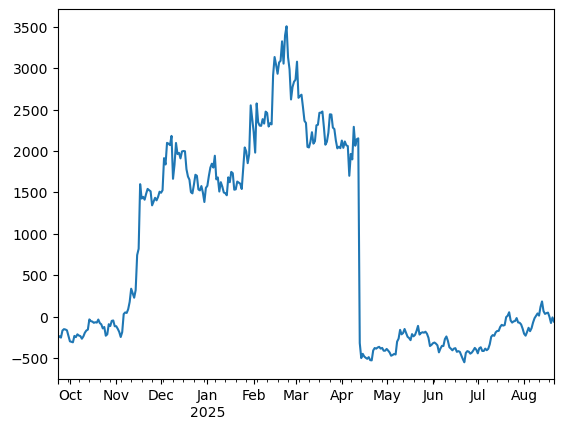

In [44]:
pnl_history['Total'].plot()

In [45]:
daily_pnl=pnl_history['Total']-pnl_history['Total'].shift(1)
daily_pnl[-31:].cumsum()

2025-07-22     41.891706
2025-07-23    -57.694201
2025-07-24    -82.863623
2025-07-25    -68.252311
2025-07-26    -63.328159
2025-07-27    -28.204333
2025-07-28    -80.977332
2025-07-29    -84.712525
2025-07-30   -105.027646
2025-07-31   -154.795614
2025-08-01   -217.280453
2025-08-02   -240.940450
2025-08-03   -196.111232
2025-08-04   -145.671141
2025-08-05   -186.691195
2025-08-06   -150.277806
2025-08-07    -81.838539
2025-08-08    -29.752078
2025-08-09     -1.133185
2025-08-10     27.446971
2025-08-11      1.320913
2025-08-12    107.732395
2025-08-13    172.772669
2025-08-14     55.827851
2025-08-15     22.039149
2025-08-16     31.455233
2025-08-17     37.641638
2025-08-18    -13.770199
2025-08-19    -87.796359
2025-08-20    -20.040557
2025-08-21    -70.712272
Name: Total, dtype: float64

In [46]:
days=0
pnl_timeframe=daily_pnl[-days:]
MtM=Binance.get_inventory().loc['Total']['Price in USDT']
var_amount=np.nanpercentile(pnl_timeframe,1)
var_pct=var_amount/MtM
cvar_amount=pnl_timeframe[pnl_timeframe<var_amount].mean()
cvar_pct=cvar_amount/MtM
var_amount,cvar_amount

(-370.9303254371398, -950.5160328166935)

In [47]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [48]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [49]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [50]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change(fill_method=None))


LDUMAUSDT not retrieved
Total not retrieved


In [51]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [52]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [53]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

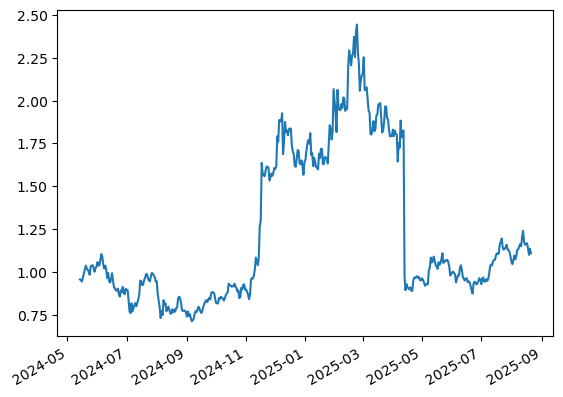

In [54]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()
plt.show()

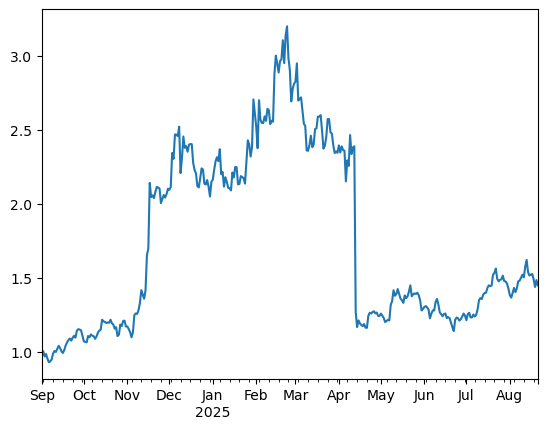

In [55]:
(1+historical_ptf['Historical Portfolio'].loc['2024-09':]).cumprod().plot()
plt.show()

## Ex ante data

In [57]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [60]:
days=0
historical_risk=RiskAnalysis(returns_to_use.iloc[-days:])
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[-days:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [61]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0]#,np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]
gold=np.where(returns_to_use.columns=='PAXGUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [64]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash]-0.00},
                                                                           {'type': 'eq', 'fun': lambda weights: 0.00-weights[gold]}])#,
                                                                              
                                                                              #{'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
BNBUSDT,0.4364
TRXUSDT,0.2021
ADAUSDT,0.0975
WBTCUSDT,0.0763
XRPUSDT,0.0762
BTCUSDT,0.0492
OMUSDT,0.0447
BCHUSDT,0.0172
PEPEUSDT,0.0005
AVAXUSDT,0.0000


In [65]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.0},
                                                                          {'type': 'ineq', 'fun': lambda weights: 0.0-weights[gold]},
                                                                          {'type': 'ineq', 'fun': lambda weights: 0.0-weights[cash]}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']
inventory

,Optimal Weights
BNBUSDT,0.414234
WBTCUSDT,0.238229
TRXUSDT,0.201536
XRPUSDT,0.108820
OMUSDT,0.037181


In [129]:
tickers_frontier=holding_tickers.copy()
tickers_frontier.extend(list(inventory.index))

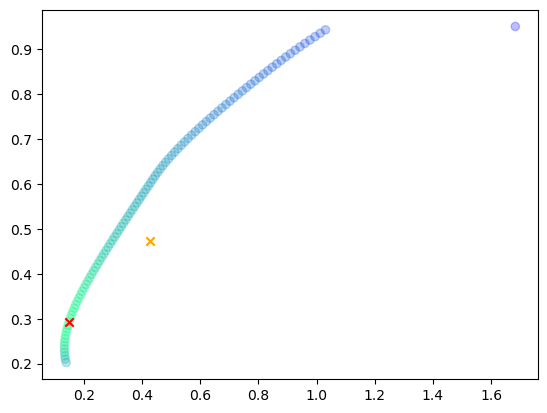

In [131]:
returns_frontier=returns_to_use[tickers_frontier].copy().iloc[-days:]
frontier_analysis=RiskAnalysis(returns_frontier)
current_weights_frontier=np.zeros(returns_frontier.shape[1])
current_weights_frontier[:current_weights.shape[0]]=current_weights
frontier_opt_weights=frontier_analysis.optimize(objective='sharpe_ratio')
X,Y,Z,C=frontier_analysis.efficient_frontier()
opt_res=frontier_analysis.performance(frontier_opt_weights),frontier_analysis.variance(frontier_opt_weights)
current_res=frontier_analysis.performance(current_weights_frontier),frontier_analysis.variance(current_weights_frontier)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')
plt.show()

In [132]:
dico={returns_frontier.columns[i]:frontier_opt_weights[i].round(4) for i in range(len(returns_frontier.columns))}
dico=pd.DataFrame(dico.values(),index=dico.keys(),columns=['Optimal Weights'])

In [133]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,dico],axis=1)
historical_comparison=historical_comparison.fillna(0)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison=historical_comparison.round(7)
historical_comparison.round(4)

,Price in USDT,Weights,Optimal Weights,Spread
BTCUSDT,1035.1901,0.4589,0.0180,0.4409
TRXUSDT,393.3520,0.1744,0.0285,0.1459
SOLUSDT,357.1218,0.1583,0.0000,0.1583
ETHUSDT,334.2463,0.1482,0.0000,0.1482
OMUSDT,117.8022,0.0522,0.0051,0.0471
BNBUSDT,18.2121,0.0081,0.0573,-0.0492
PEPEUSDT,0.0000,0.0000,0.0032,-0.0032
PAXGUSDT,0.0000,0.0000,0.7432,-0.7432
WBTCUSDT,0.0000,0.0000,0.0199,-0.0199
XRPUSDT,0.0000,0.0000,0.0340,-0.0340


### Current results

In [135]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

gold_current=np.where(ex_ante_perf_to_use.columns=='PAXGUSDT')[0][0]

In [136]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: 0.00-weights[gold_current]}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
BNBUSDT,0.426058
BTCUSDT,0.319549
TRXUSDT,0.214291
OMUSDT,0.040102


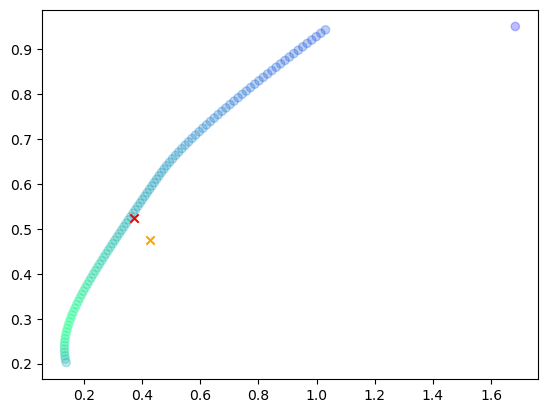

In [137]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')
plt.show()


In [138]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison=current_holding_comparison.round(7)
current_holding_comparison.round(4)

,Price in USDT,Weights,Optimal Weights,Spread
BTCUSDT,1035.1901,0.4589,0.3195,0.1393
TRXUSDT,393.3520,0.1744,0.2143,-0.0399
SOLUSDT,357.1218,0.1583,0.0000,0.1583
ETHUSDT,334.2463,0.1482,0.0000,0.1482
OMUSDT,117.8022,0.0522,0.0401,0.0121
BNBUSDT,18.2121,0.0081,0.4261,-0.4180
PEPEUSDT,0.0000,0.0000,0.0000,0.0000


# Risk Reward Analysis

In [140]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [141]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

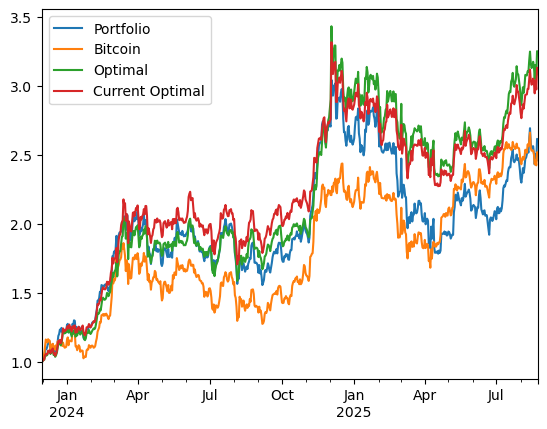

In [142]:
days=0
(1+portfolio_perf.iloc[-days:]).cumprod().plot()
plt.show()

In [143]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

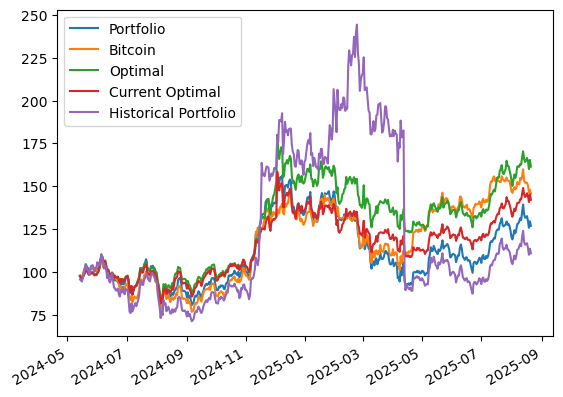

In [144]:
days=0
((1+current_perf.iloc[-days:]).cumprod()*100).plot()
plt.show()


<Axes: >

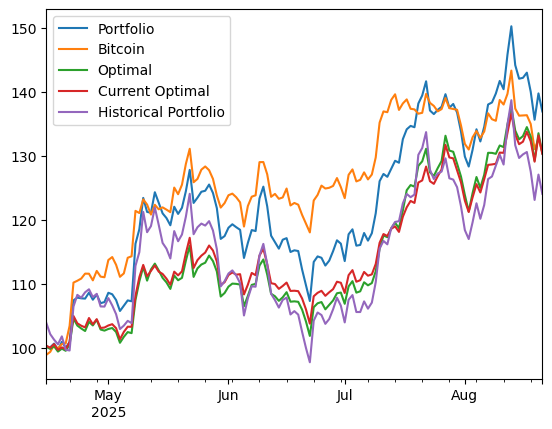

In [145]:
((1+current_perf.loc['2025-04-15':]).cumprod()*100).plot()

## Volatilities

In [147]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.377567
 dtype: float64,
 0.3778633256861335)

In [148]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.427412
 dtype: float64,
 0.42741240786050033)

In [149]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.427412
Bitcoin            0.406918
Optimal            0.377863
Current Optimal    0.371047
dtype: float64

In [150]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.531064475098356

In [151]:
days=30
current_perf['Historical Portfolio'].iloc[-days:].mean()*252/(current_perf['Historical Portfolio'].iloc[-days:].std()*np.sqrt(252))

-1.4325076646327484

<Axes: >

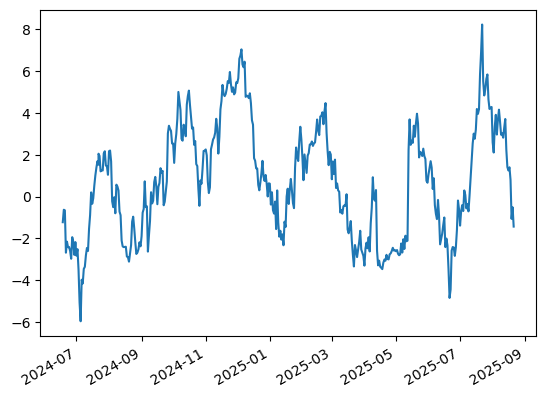

In [152]:
window=30
rolling_sharpe_ratio=current_perf['Historical Portfolio'].rolling(window).mean()*252/(current_perf['Historical Portfolio'].rolling(window).std()*np.sqrt(252))
rolling_sharpe_ratio.plot()

In [153]:
current_risk.performance(current_weights)/current_risk.variance(current_weights)

1.1108253172001232

## Risk Contribution

In [155]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis.loc['Portfolio']=perf_analysis.sum(axis=0)
perf_analysis.round(4)

,Performance Contribution,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,86.4972,0.4185,0.2346,0.1840
WBTCUSDT,36.3690,0.1984,0.0646,0.1338
TRXUSDT,29.1916,0.1879,0.0969,0.0910
XRPUSDT,19.5094,0.1298,0.0400,0.0898
OMUSDT,-36.5571,0.0653,0.0274,0.0379
Portfolio,135.0103,1.0000,0.4635,0.5365


In [156]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis.loc['Portfolio']=perf_analysis.sum(axis=0)
perf_analysis

,Performance Contribution,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,88.966249,0.445053,0.257379,0.187674
BTCUSDT,48.596973,0.275473,0.122809,0.152664
TRXUSDT,31.039140,0.206626,0.113605,0.093021
OMUSDT,-39.429036,0.072849,0.033109,0.039740
Portfolio,129.173326,1.000000,0.526902,0.473098


In [157]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis.loc['Portfolio']=perf_analysis.sum(axis=0)
perf_analysis

,Performance Contribution,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BTCUSDT,69.956744,0.394708,0.191794,0.202913
TRXUSDT,24.623777,0.109987,0.053883,0.056104
SOLUSDT,12.034922,0.229643,0.073019,0.156624
ETHUSDT,8.268059,0.170954,0.041124,0.129830
BNBUSDT,2.088125,0.007045,0.000107,0.006938
OMUSDT,-49.160934,0.087663,0.038790,0.048873
Portfolio,67.810693,1.000000,0.398717,0.601283


# Value At Risk

## Historical

### Optimal Weights

In [161]:
var,cvar=historical_risk.historical_var(opt_weights,Q=1)
(var,cvar)

(-0.06426886710486077, -0.08083721275777626)

### Current Weights

In [163]:
var,cvar=current_risk.historical_var(current_weights,Q=1)
(var,cvar)

(-0.06814489623473467, -0.09039793938432165)

In [164]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.01
row=round(historical_var.shape[0]*centile)

In [165]:
var=historical_var.iloc[row]
var

BTCUSDT     -0.022415
TRXUSDT     -0.007168
SOLUSDT     -0.016133
ETHUSDT     -0.011075
OMUSDT      -0.010724
BNBUSDT     -0.000740
PEPEUSDT    -0.000000
PAXGUSDT     0.000000
Portfolio   -0.068255
Name: 2024-04-13 00:00:00, dtype: float64

In [166]:
cvar=historical_var.iloc[:row+1].mean()
cvar

BTCUSDT     -0.025985
TRXUSDT     -0.009893
SOLUSDT     -0.020317
ETHUSDT     -0.014857
OMUSDT      -0.018668
BNBUSDT     -0.000678
PEPEUSDT     0.000000
PAXGUSDT     0.000000
Portfolio   -0.090398
dtype: float64

## Parametric

### Optimal Weights

In [169]:
var,cvar=historical_risk.parametric_var(opt_weights,Q=0.99)

(var,cvar)

(-0.055374412346300736, -0.06858483204518923)

### Current Weights

In [173]:
var,cvar=current_risk.parametric_var(current_weights,Q=0.99)

(var,cvar)

(-0.06263563914761032, -0.07757833643662887)

## Multivariate

### Optimal Weights

In [203]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.05249019310899847, -0.05975110343209502)

### Current Weights

In [205]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06069553240659255, -0.07101760928205796)

In [206]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.01)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.01)]

    scenario_multivariate[i]=results.to_dict()

scenario=pd.DataFrame(scenario_multivariate).T
mean_scenario_multivariate=scenario.mean()
mean_scenario_multivariate

BTCUSDT     -0.023580
TRXUSDT     -0.006386
SOLUSDT     -0.013656
ETHUSDT     -0.010960
OMUSDT      -0.005691
BNBUSDT     -0.000433
Portfolio   -0.060706
dtype: float64

In [207]:
index_cvar=scenario['Portfolio']<mean_scenario_multivariate['Portfolio']
cvar_multivariate=scenario.loc[index_cvar].mean()
cvar_multivariate

BTCUSDT     -0.024737
TRXUSDT     -0.005219
SOLUSDT     -0.014441
ETHUSDT     -0.011010
OMUSDT      -0.005982
BNBUSDT     -0.000478
Portfolio   -0.061867
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [211]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.054512971051551784, -0.06235751630500864)

### Current Weights

In [213]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.06041485258149942, -0.07032174682520234)

In [214]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.01)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.01)]
    
    scenario_gaussian[i]=results

scenario=pd.DataFrame(scenario_gaussian).T
mean_scenario_gaussian=scenario.mean()

index_cvar=scenario['Portfolio']<mean_scenario_gaussian['Portfolio']
cvar_gaussian=scenario.loc[index_cvar].mean()

## Student Copula

### Optimal Weights

In [217]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.053777958593041644, -0.060965283052865915)

### Current Weights

In [219]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.06261220034268693, -0.07405571631906391)

In [220]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.01)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.01)]
    
    scenario_t_copula[i]=results
    
scenario=pd.DataFrame(scenario_t_copula).T
mean_scenario_student=scenario.mean()

index_cvar=scenario['Portfolio']<mean_scenario_student['Portfolio']
cvar_student=scenario.loc[index_cvar].mean()

## Gumbel Copula

### Optimal Weights

In [223]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.08583535924453928, -0.10536404754258179)

### Current Weights

In [225]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.08843823705015422, -0.1053574188889415)

In [226]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    

scenario=pd.DataFrame(scenario_gumbel_copula).T
mean_scenario_gumbel=scenario.mean()

index_cvar=scenario['Portfolio']<mean_scenario_gumbel['Portfolio']
cvar_gumbel=scenario.loc[index_cvar].mean()

## Monte Carlo

### Optimal

In [229]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [230]:
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.05809800987204373, -0.06671209308444731)

### Current Weights

In [232]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.06018672093608372, -0.07109487695738563)

In [233]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results

scenario=pd.DataFrame(scenario_monte_carlo).T
mean_scenario_monte_carlo=scenario.mean()

index_cvar=scenario['Portfolio']<mean_scenario_monte_carlo['Portfolio']
cvar_monte_carlo=scenario.loc[index_cvar].mean()

In [234]:
summary_var=pd.concat([mean_scenario_gumbel,mean_scenario_gaussian,mean_scenario_monte_carlo,mean_scenario_multivariate,mean_scenario_student],axis=1)
summary_var.columns=['Gumbel','Gaussian','Monte Carlo','Multivariate','Student']
summary_var

,Gumbel,Gaussian,Monte Carlo,Multivariate,Student
BTCUSDT,-0.027983,-0.023323,-0.016841,-0.023580,-0.024569
TRXUSDT,-0.009825,-0.007218,-0.005458,-0.006386,-0.007542
SOLUSDT,-0.010903,-0.014223,-0.010262,-0.013656,-0.014335
ETHUSDT,-0.003260,-0.010674,-0.007089,-0.010960,-0.010449
OMUSDT,-0.005237,-0.004962,-0.005178,-0.005691,-0.005996
BNBUSDT,0.000044,-0.000406,-0.000289,-0.000433,-0.000448
Portfolio,-0.057164,-0.060807,-0.045117,-0.060706,-0.063339


In [235]:
summary_cvar=pd.concat([cvar_gumbel,cvar_gaussian,cvar_monte_carlo,cvar_multivariate,cvar_student],axis=1)
summary_cvar.columns=['Gumbel','Gaussian','Monte Carlo','Multivariate','Student']
summary_cvar

,Gumbel,Gaussian,Monte Carlo,Multivariate,Student
BTCUSDT,-0.029816,-0.024092,-0.016119,-0.024737,-0.025140
TRXUSDT,-0.008342,-0.007130,-0.005505,-0.005219,-0.006476
SOLUSDT,-0.009877,-0.014583,-0.010421,-0.014441,-0.014982
ETHUSDT,-0.006545,-0.010878,-0.007361,-0.011010,-0.010949
OMUSDT,-0.003497,-0.004470,-0.005848,-0.005982,-0.006234
BNBUSDT,0.000059,-0.000414,-0.000292,-0.000478,-0.000433
Portfolio,-0.058018,-0.061567,-0.045545,-0.061867,-0.064213


## VaR Violation

In [237]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2023-12-30,-0.030664,-0.040813,-0.035350,0.007410
2023-12-31,-0.030664,-0.040959,-0.033743,-0.001543
2024-01-01,-0.030664,-0.041107,-0.035020,0.014873
2024-01-02,-0.030664,-0.041036,-0.034293,0.005108
2024-01-03,-0.030664,-0.041785,-0.037316,-0.019095
...,...,...,...,...
2025-08-19,-0.028367,-0.041327,-0.041084,-0.028443
2025-08-20,-0.028367,-0.043588,-0.042535,0.033226
2025-08-21,-0.028367,-0.044378,-0.043854,-0.023535
2025-08-22,-0.027919,-0.048730,-0.046524,0.056607


In [238]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2023-12-15,-0.053163,-0.057569,-0.050874,-0.036100
2023-12-16,-0.053163,-0.057314,-0.051569,0.009732
2023-12-17,-0.053163,-0.057626,-0.054025,-0.020193
2023-12-18,-0.053163,-0.058719,-0.056463,0.021425
2023-12-19,-0.053163,-0.057559,-0.054850,-0.008973
...,...,...,...,...
2025-08-19,-0.039149,-0.053016,-0.052886,-0.031282
2025-08-20,-0.039149,-0.054811,-0.051704,0.030383
2025-08-21,-0.039149,-0.055896,-0.054998,-0.020216
2025-08-22,-0.039149,-0.066727,-0.062535,0.065813


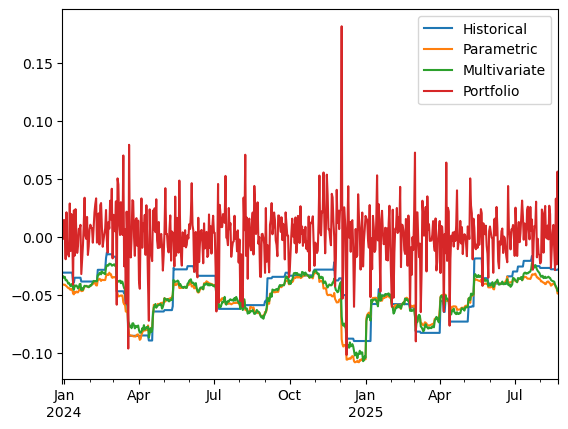

In [239]:
var_data.plot()
plt.show()

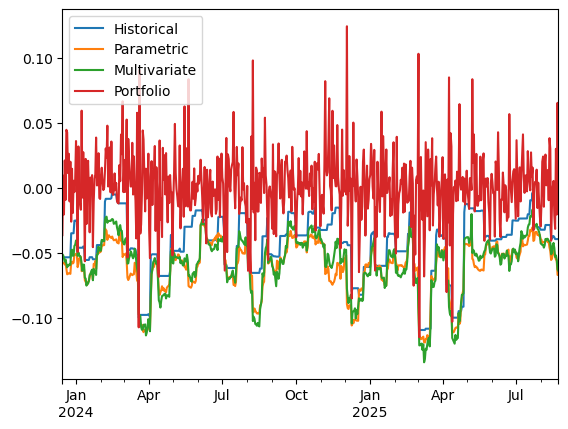

In [240]:
current_var_data.plot()
plt.show()


In [241]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.033167,0.018242,0.018242
Kupiec Stat,4.060683,16.750783,16.750783
P-value,0.043893,0.000043,0.000043


In [242]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.069579,0.014563,0.012945
Kupiec Stat,4.469288,22.403373,25.060795
P-value,0.034509,0.000002,0.000001


# Principal Component Analysis

## Historical PCA

In [245]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.58812262, 0.23903502, 0.08072066, 0.05271702, 0.03940469])

In [246]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

ADAUSDT      0.064155
AVAXUSDT     0.064407
BCHUSDT      0.048696
BNBUSDT      0.028236
BTCUSDT      0.032597
DOGEUSDT     0.066981
ETHUSDT      0.047757
HBARUSDT     0.064297
LINKUSDT     0.060141
LTCUSDT      0.044915
OMUSDT       0.075337
PAXGUSDT     0.000659
PEPEUSDT     0.084992
SOLUSDT      0.056475
SUIUSDT      0.061891
TRXUSDT      0.018011
USDCUSDT    -0.000162
WBETHUSDT    0.047747
WBTCUSDT     0.032385
XLMUSDT      0.050711
XRPUSDT      0.049771
Name: PC1, dtype: float64

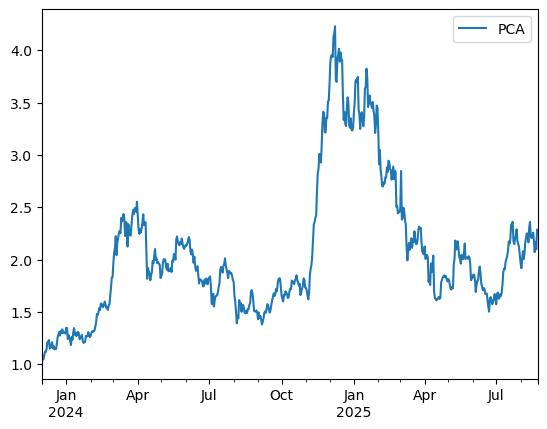

In [247]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()
plt.show()

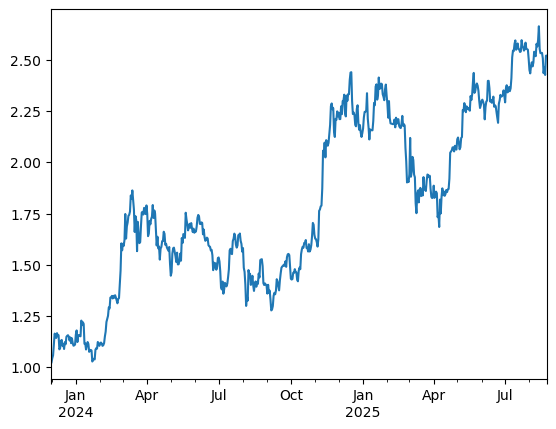

In [248]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()
plt.show()


In [249]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances[:20]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
WBETHUSDT    0.506477
ETHUSDT      0.507026
WBTCUSDT     0.546010
BTCUSDT      0.547035
AVAXUSDT     0.668983
SOLUSDT      0.677280
LINKUSDT     0.695018
DOGEUSDT     0.699181
BNBUSDT      0.711940
LTCUSDT      0.715059
ADAUSDT      0.727503
XRPUSDT      0.752905
BCHUSDT      0.834502
XLMUSDT      0.902942
USDCUSDT     0.943218
PAXGUSDT     0.954424
SUIUSDT      1.081479
TRXUSDT      1.088015
HBARUSDT     1.104624
dtype: float64

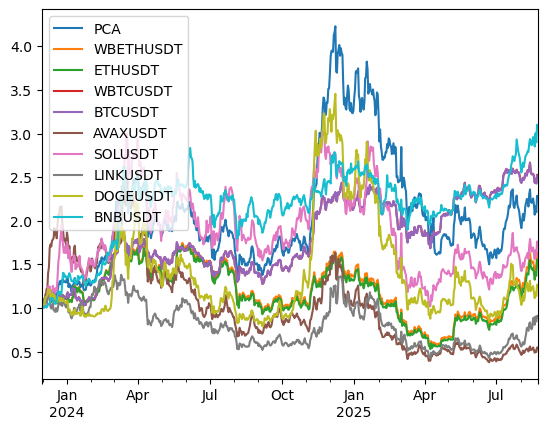

In [250]:
(1+comparison[distances.index[:10]]).cumprod().plot()
plt.show()

<Axes: >

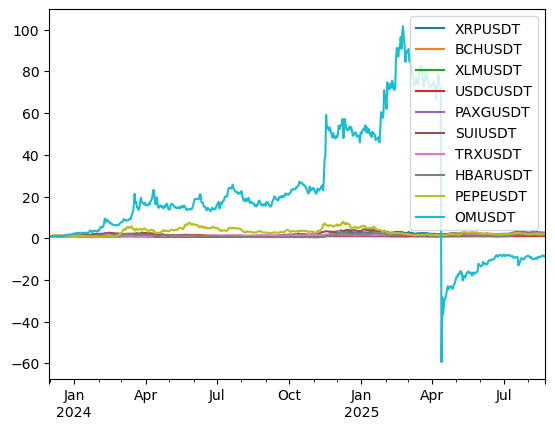

In [251]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [253]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.55391924, 0.30682135, 0.06855634, 0.04832159, 0.02238148])

In [254]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

BTCUSDT     0.061495
TRXUSDT     0.033407
SOLUSDT     0.112730
ETHUSDT     0.086308
OMUSDT      0.480625
BNBUSDT     0.054508
PEPEUSDT    0.169251
PAXGUSDT    0.001677
Name: PC1, dtype: float64

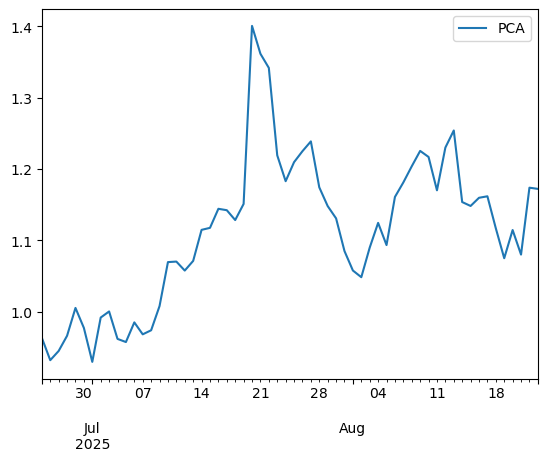

In [255]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA.iloc[-60:]).cumprod().plot()
plt.show()

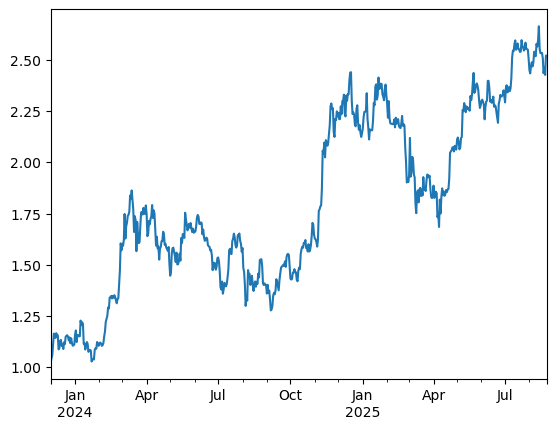

In [256]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()
plt.show()


In [257]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA         0.000000
BTCUSDT     1.303785
ETHUSDT     1.317251
SOLUSDT     1.338180
OMUSDT      1.358369
BNBUSDT     1.372038
PAXGUSDT    1.506158
TRXUSDT     1.604944
PEPEUSDT    1.732768
dtype: float64

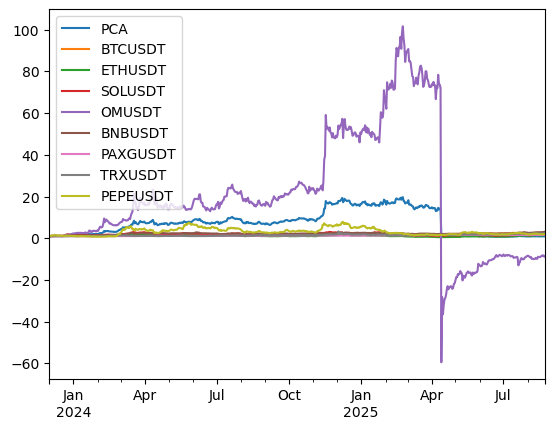

In [258]:
(1+comparison[distances.index[:10]]).cumprod().plot()
plt.show()


## Sensitivity Analysis

In [260]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT    1.922380
SOLUSDT     1.294795
ETHUSDT     1.106621
BTCUSDT     1.000000
OMUSDT      0.999786
BNBUSDT     0.670137
TRXUSDT     0.334212
PAXGUSDT    0.029934
Name: BTCUSDT, dtype: float64

In [261]:
days=30
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

ETHUSDT     2.123355
PEPEUSDT    2.098269
SOLUSDT     2.056133
OMUSDT      1.676507
BNBUSDT     1.215994
BTCUSDT     1.000000
TRXUSDT     0.541248
PAXGUSDT    0.114881
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [263]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [264]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
PEPEUSDT,0.248429
BNBUSDT,0.246273
ETHUSDT,0.210396
PAXGUSDT,0.189477
BTCUSDT,0.165710
OMUSDT,0.135223
SOLUSDT,0.082102
TRXUSDT,0.035069


### Regression to PCA

In [266]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-30:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

1.4386997880303323

In [267]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT     1.202871
PCA         1.000000
BNBUSDT     0.883819
ETHUSDT     0.873933
SOLUSDT     0.662238
PEPEUSDT    0.382615
TRXUSDT     0.323112
PAXGUSDT    0.209593
OMUSDT      0.162402
dtype: float64

In [268]:
reg=ex_ante_perf.copy().dropna().iloc[-30:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT     1.869625
PAXGUSDT    1.793359
BNBUSDT     1.197629
TRXUSDT     1.052872
PCA         1.000000
SOLUSDT     0.838864
ETHUSDT     0.796109
PEPEUSDT    0.729798
OMUSDT      0.706756
dtype: float64

### Correlation Matrix

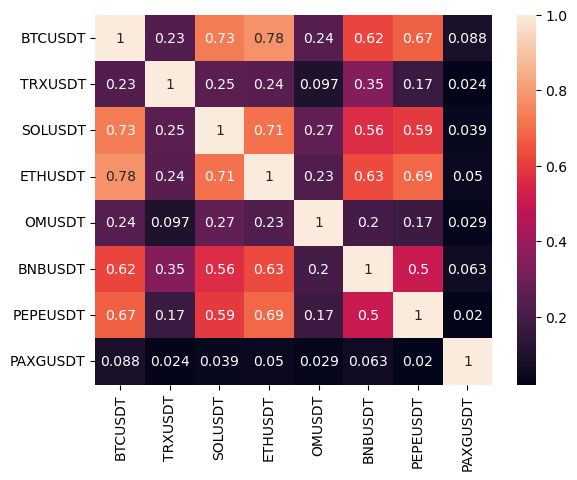

In [270]:
sns.heatmap(ex_ante_perf.corr(),annot=True)
plt.show()


<Axes: >

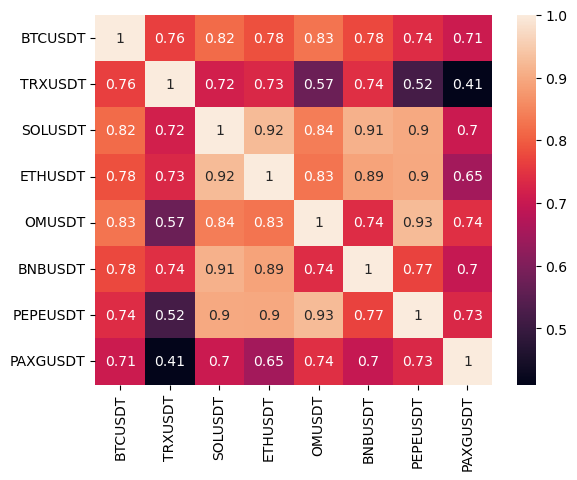

In [271]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

In [272]:
gold=get_close(['SPY','GOLD.PA'],start=start_date.strftime("%Y-%m-%d"),end=enddate.strftime("%Y-%m-%d")).dropna()
gold.index=pd.to_datetime(gold.index)
pct_change=gold.pct_change().sort_index()

In [273]:
correlation=pct_change['GOLD.PA'].rolling(30).corr(pct_change['SPY']).dropna()
beta=(pct_change['GOLD.PA'].rolling(30).cov(pct_change['SPY']).dropna()/pct_change['SPY'].rolling(30).var().dropna())

<Axes: >

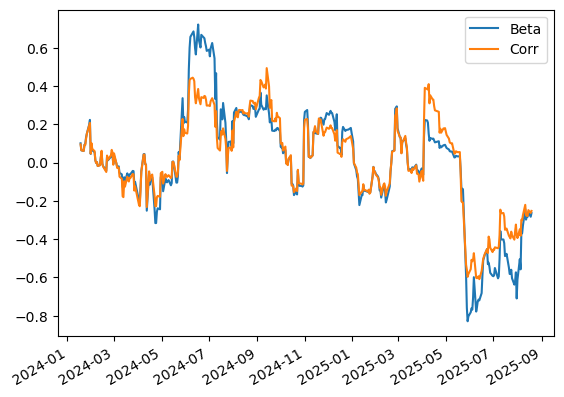

In [274]:
info=pd.DataFrame()
info['Beta']=beta
info['Corr']=correlation

info.plot()

## Sliding window optimization

In [276]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,BTCUSDT,TRXUSDT,SOLUSDT,ETHUSDT,OMUSDT,BNBUSDT,PEPEUSDT,PAXGUSDT
2023-12-14,0.107613,0.000000,0.000000,0.000000,0.104338,0.522522,0.000000,0.265527
2023-12-28,0.000000,0.000000,0.331762,0.000000,0.000000,0.668238,0.000000,0.000000
2024-01-11,0.000000,0.000000,0.000000,0.439739,0.560261,0.000000,0.000000,0.000000
2024-01-25,0.000000,0.379486,0.000000,0.000000,0.104620,0.000000,0.000000,0.515894
2024-02-08,0.000000,0.066364,0.041760,0.191143,0.047113,0.000000,0.000000,0.653620
2024-02-22,0.000000,0.705974,0.000000,0.164223,0.000000,0.129803,0.000000,0.000000
2024-03-07,0.000000,0.000000,0.156080,0.020832,0.000000,0.000000,0.046602,0.776486
2024-03-21,0.000000,0.000000,0.000000,0.000000,0.462471,0.471815,0.065714,0.000000
2024-04-04,0.000920,0.000000,0.000000,0.000000,0.019296,0.113904,0.000000,0.865879
2024-04-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [277]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='PAXGUSDT')[0][0]

In [278]:
for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit[0]]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,ADAUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BTCUSDT,DOGEUSDT,ETHUSDT,HBARUSDT,LINKUSDT,LTCUSDT,...,PAXGUSDT,PEPEUSDT,SOLUSDT,SUIUSDT,TRXUSDT,USDCUSDT,WBETHUSDT,WBTCUSDT,XLMUSDT,XRPUSDT
2025-01-15,0.106751,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.893249
2025-02-14,0.106751,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.680288,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2025-03-16,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2025-04-15,0.106750,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.366574,0.0,0.0,0.000000,0.526675,0.0,0.000000,0.000000,0.000000,0.000000
2025-05-15,0.106751,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.132093,...,0.304262,0.0,0.0,0.153689,0.180130,0.0,0.000000,0.123075,0.000000,0.000000
2025-06-14,0.000000,0.0,0.135655,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.864345,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2025-07-14,0.106751,0.0,0.206331,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.220059,0.466859
2025-08-13,0.106751,0.0,0.000000,0.000000,0.0,0.0,0.083302,0.0,0.000000,0.056118,...,0.000000,0.0,0.0,0.000000,0.489708,0.0,0.264121,0.000000,0.000000,0.000000
2025-08-23,0.106751,0.0,0.000000,0.640717,0.0,0.0,0.000000,0.0,0.252532,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [279]:
rolling_optimization.iloc[-2].sort_values(ascending=False)[:6]

TRXUSDT      0.489708
WBETHUSDT    0.264121
ADAUSDT      0.106751
ETHUSDT      0.083302
LTCUSDT      0.056118
PEPEUSDT     0.000000
Name: 2025-08-13 00:00:00, dtype: float64

<Axes: >

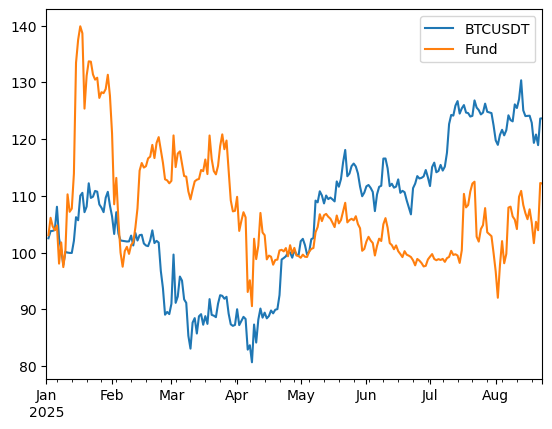

In [280]:
q=rebalanced_dynamic_quantities(data[returns_to_use.columns],rolling_optimization)
ptf=q*data[returns_to_use.columns]
comparison=pd.DataFrame()
comparison['BTCUSDT']=data['BTCUSDT']
comparison['Fund']=ptf.sum(axis=1)
((1+comparison.loc['2025'].pct_change()).cumprod()*100).plot()

In [281]:
(ptf-rebalanced_book_cost(data[returns_to_use.columns],q)).iloc[-1].sort_values(ascending=False)

XRPUSDT      335.332035
BCHUSDT       25.406152
TRXUSDT       19.502961
PAXGUSDT       3.995032
WBETHUSDT      1.862715
WBTCUSDT       0.793873
ETHUSDT        0.512704
AVAXUSDT       0.000000
SOLUSDT        0.000000
PEPEUSDT       0.000000
LINKUSDT       0.000000
HBARUSDT       0.000000
DOGEUSDT       0.000000
BTCUSDT        0.000000
BNBUSDT        0.000000
USDCUSDT       0.000000
XLMUSDT       -2.043736
OMUSDT        -3.698312
LTCUSDT       -8.702233
SUIUSDT      -14.113800
ADAUSDT      -43.992803
Name: 2025-08-23 00:00:00, dtype: float64

In [282]:
git.create_or_replace_notebook("Prod.ipynb")

File 'Prod.ipynb' exists. Replacing the file...
✅ File 'Prod.ipynb' successfully pushed/updated to GitHub!
